In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant
%matplotlib inline

# Exercise 1: 
## a) Compute the correlation between mean salary and year.
## b) Generate a graph of mean salary per year.

In [3]:
salary_df = pd.read_csv('salary.csv')
salary_df.head()

,year,team_id,league_id,player_id,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [12]:
year_group = salary_df.groupby('year', as_index=False).mean()
year_group.head()

,year,salary
0,1985,476299
1,1986,417147
2,1987,434729
3,1988,453171
4,1989,506323


In [5]:
year_group.corr()

,year,salary
year,1.000000,0.983687
salary,0.983687,1.000000


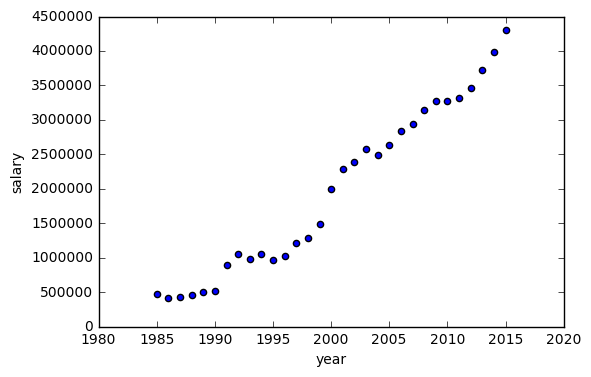

In [6]:
year_group.plot.scatter(x='year', y='salary')

# Exercise 2: 
## a) Find the best line that approximates mean salary with respect to years. 
## b) Plot this line together with the data from exercise 1.

In [7]:
results = smf.ols('salary ~ year', data=year_group).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     867.2
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           3.70e-23
Time:                        10:48:46   Log-Likelihood:                -424.86
No. Observations:                  31   AIC:                             853.7
Df Residuals:                      29   BIC:                             856.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -2.63e+08      9e+06    -29.228      0.000     -2.81e+08 -2.45e+08
year        1.325e+05   4499.196     29.448      0.000      1.23e+05  1.42e+05
==============================================================================
Omnibus:                        0.781   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.511
Skew:                          -0.310   Prob(JB):                        0.774
Kurtosis:                       2.890   Cond. No.                     4.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

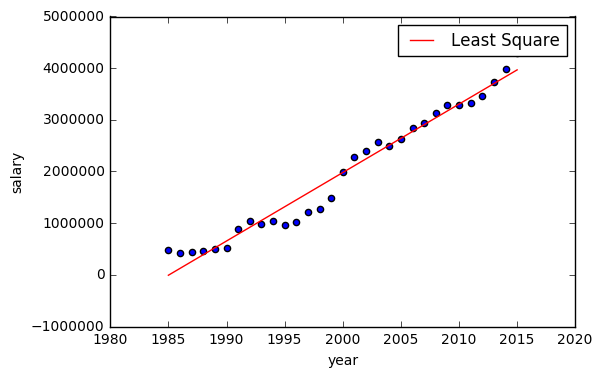

In [8]:
year_group.plot.scatter(x='year', y='salary')
plt.plot(year_group['year'], results.params[0] + results.params[1] * year_group['year'], label='Least Square', c='r')
plt.legend()

# Exercise 3: Create a box plot for salaries per year.

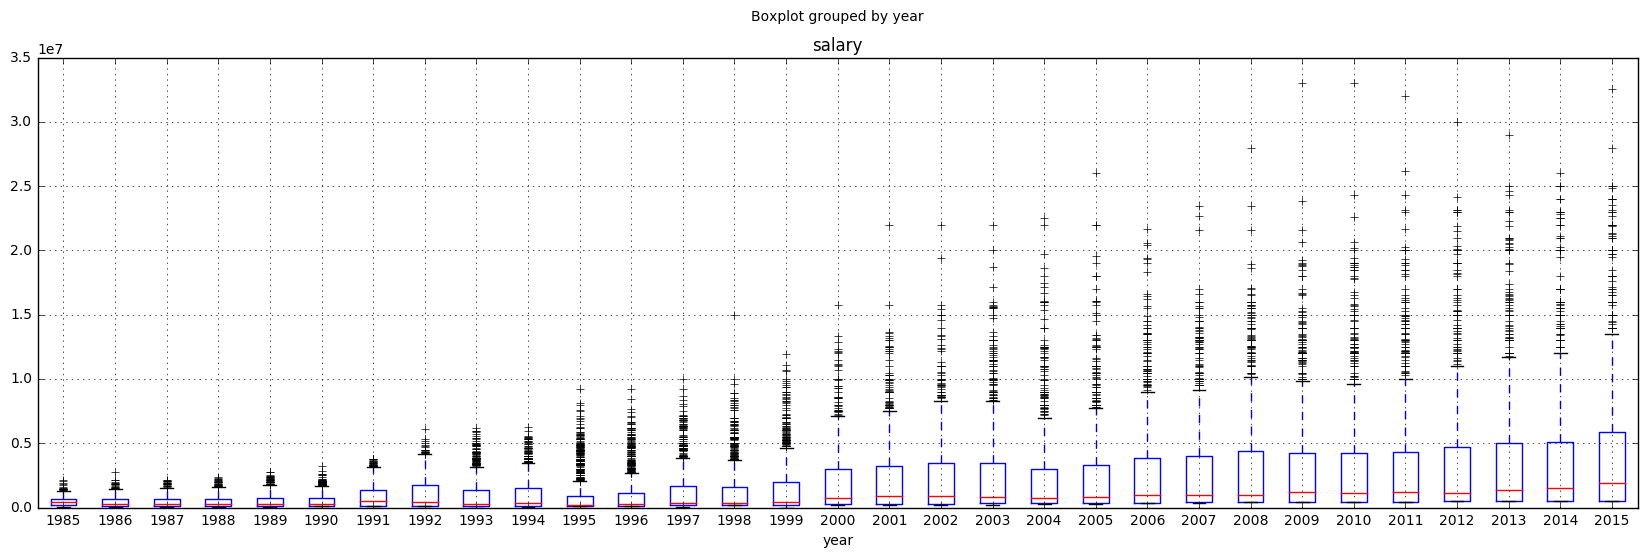

In [10]:
salary_df.boxplot(column='salary', by='year', figsize=(20,6))

# Exercise 4: From the previous graph we can see an increasing disparity in salaries as time increases. 
## a) How would you measure disparity in salaries? 
## b) Compute the correlation of disparity and years.
## c) Find the best line that approximates disparity with respect to years.

a) We could look at standard deviation and plot that over the years.

In [14]:
salary_std = salary_df.groupby('year', as_index=False).std()
salary_std

,year,salary
0,44.553339,3.433209e+05
1,44.564560,3.940176e+05
2,44.575778,4.311822e+05
3,44.586994,4.531581e+05
4,44.598206,5.380454e+05
5,44.609416,5.524405e+05
6,44.620623,9.398494e+05
7,44.631827,1.180646e+06
8,44.643029,1.284734e+06
9,44.654227,1.352683e+06


In [15]:
salary_std.corr()

,year,salary
year,1.0000,0.9921
salary,0.9921,1.0000


In [16]:
results = smf.ols('salary ~ year', data=salary_std).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1814.
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           1.06e-27
Time:                        11:17:34   Log-Likelihood:                -423.28
No. Observations:                  31   AIC:                             850.6
Df Residuals:                      29   BIC:                             853.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -7.257e+08   1.71e+07    -42.436      0.000     -7.61e+08 -6.91e+08
year        1.629e+07   3.82e+05     42.589      0.000      1.55e+07  1.71e+07
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.040
Skew:                          -0.057   Prob(JB):                        0.980
Kurtosis:                       2.867   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

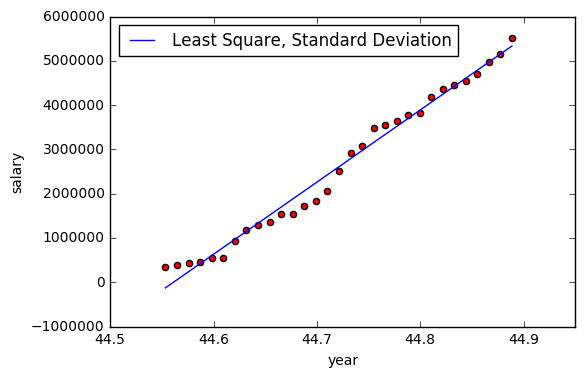

In [21]:
salary_std.plot.scatter(x='year',y='salary',c='r')
plt.plot(salary_std['year'], results.params[0] + results.params[1] * salary_std['year'], label='Least Square, Standard Deviation')
plt.legend(loc='best')

# Exercise 5: 
## a) Build a predictive model for the amount of hits for a team given Games played, Wins, Walks by batters, At bats, Fielding  percentage, Outs Pitched (innings pitched x 3), Hits allowed, Earned runs allowed, Doubles. To solve this problem you will use team.csv. 

## b) How does your model measure accuracy?
## c) What was the score for its accuracy?
## d) Choose two features and create a 3d plot of feature1, feature2, h.

In [24]:
team_df = pd.read_csv('team.csv')
team_df.head

,year,league_id,team_id,franchise_id,div_id,rank,g,ghome,w,l,...,dp,fp,name,park,attendance,bpf,ppf,team_id_br,team_id_lahman45,team_id_retro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [25]:
team_df.columns

Index(['year', 'league_id', 'team_id', 'franchise_id', 'div_id', 'rank', 'g',
       'ghome', 'w', 'l', 'div_win', 'wc_win', 'lg_win', 'ws_win', 'r', 'ab',
       'h', 'double', 'triple', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf',
       'ra', 'er', 'era', 'cg', 'sho', 'sv', 'ipouts', 'ha', 'hra', 'bba',
       'soa', 'e', 'dp', 'fp', 'name', 'park', 'attendance', 'bpf', 'ppf',
       'team_id_br', 'team_id_lahman45', 'team_id_retro'],
      dtype='object')

In [26]:
# a)
results = smf.ols('h ~ g + w + bb + ab + fp + ipouts + ha + era + double', data=team_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      h   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     6839.
Date:                Thu, 09 Mar 2017   Prob (F-statistic):               0.00
Time:                        11:45:08   Log-Likelihood:                -14708.
No. Observations:                2805   AIC:                         2.944e+04
Df Residuals:                    2795   BIC:                         2.950e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -368.4495     56.394     -6.533      0.000      -479.028  -257.871
g             -1.7572      0.542     -3.243      0.001        -2.820    -0.695
w              4.2326      0.111     38.106      0.000         4.015     4.450
bb            -0.0408      0.013     -3.147      0.002        -0.066    -0.015
ab             0.4193      0.010     40.936      0.000         0.399     0.439
fp           373.1649     69.292      5.385      0.000       237.296   509.034
ipouts        -0.3592      0.021    -17.211      0.000        -0.400    -0.318
ha             0.4320      0.014     31.265      0.000         0.405     0.459
era           -8.1236      2.446     -3.321      0.001       -12.920    -3.327
double         0.2695      0.030      8.856      0.000         0.210     0.329
==============================================================================
Omnibus:                       21.643   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.627
Skew:                           0.103   Prob(JB):                     6.08e-07
Kurtosis:                       3.450   Cond. No.                     6.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

b) & c) accuracy by r-squared, which is 0.957 and 0.956 for adjusted r-squared.


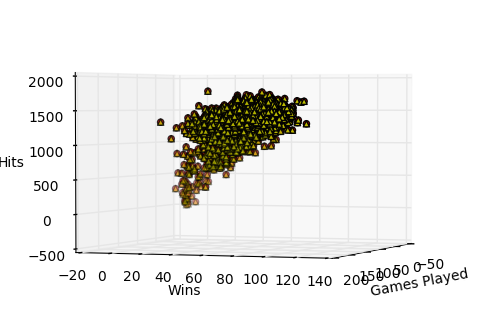

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
for c, m in [('r', 'o'), ('y', '^')]:
    xs = team_df['g']
    ys = team_df['w']
    zs = team_df['h']
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Games Played')
ax.set_ylabel('Wins')
ax.set_zlabel('Hits')

ax.view_init(elev=2, azim=20)

plt.show()

# Exercise 6: Build a similar model to predict average hits per year based on Games played, At bats and whether a player is a left or right handed batter. Consider only those players who are either left or right handed batters and for the moment do not worry about missing data or ambidextrous batters. 

In [54]:
batting_df = pd.read_csv('batting.csv')
batting_df.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [55]:
players_df = pd.read_csv('player.csv')
players_df.head()

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,...,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [56]:
players_bats = players_df[(players_df['bats'] == 'L') | (players_df['bats'] == 'R')]
players_bats.head()

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,...,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [60]:
players_bats.columns

Index(['player_id', 'birth_year', 'birth_month', 'birth_day', 'birth_country',
       'birth_state', 'birth_city', 'death_year', 'death_month', 'death_day',
       'death_country', 'death_state', 'death_city', 'name_first', 'name_last',
       'name_given', 'weight', 'height', 'bats', 'throws', 'debut',
       'final_game', 'retro_id', 'bbref_id'],
      dtype='object')

In [64]:
players_new = players_bats[['player_id', 'bats']]
players_new.tail()

,player_id,bats
18841,zupofr01,L
18842,zuvelpa01,R
18843,zuverge01,R
18844,zwilldu01,L
18845,zychto01,R


Build a similar model to predict average hits per year based on Games played, At bats and whether a player is a left or right handed batter. Consider only those players who are either left or right handed batters and for the moment do not worry about missing data or ambidextrous batters.

In [58]:
batting_df.columns

Index(['player_id', 'year', 'stint', 'team_id', 'league_id', 'g', 'ab', 'r',
       'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb',
       'hbp', 'sh', 'sf', 'g_idp'],
      dtype='object')

In [81]:
batting_new = batting_df[['player_id', 'year', 'g', 'h', 'ab']]
batting_new.head()

,player_id,year,g,h,ab
0,abercda01,1871,1,0.0,4.0
1,addybo01,1871,25,32.0,118.0
2,allisar01,1871,29,40.0,137.0
3,allisdo01,1871,27,44.0,133.0
4,ansonca01,1871,25,39.0,120.0


In [82]:
batting_new = batting_new.groupby(['player_id', 'year'])[batting_new.columns[2:]].sum().reset_index()
batting_new = batting_new.groupby(['player_id'])[batting_new.columns[2:]].mean().reset_index()
batting_new.head()

,player_id,g,h,ab
0,aardsda01,36.777778,0.000000,0.444444
1,aaronha01,143.391304,163.956522,537.565217
2,aaronto01,62.428571,30.857143,134.857143
3,aasedo01,34.461538,0.000000,2.500000
4,abadan01,5.000000,0.666667,7.000000


In [85]:
both = batting_new.merge(players_new, how='left', on='player_id').dropna()
both.head()

,player_id,g,h,ab,bats
0,aardsda01,36.777778,0.000000,0.444444,R
1,aaronha01,143.391304,163.956522,537.565217,R
2,aaronto01,62.428571,30.857143,134.857143,R
3,aasedo01,34.461538,0.000000,2.500000,R
4,abadan01,5.000000,0.666667,7.000000,L


In [88]:
both['bats'] = both.apply(lambda x: 1 if (x['bats'] == 'R') else 0, 1)
both.head()

,player_id,g,h,ab,bats
0,aardsda01,36.777778,0.000000,0.444444,1
1,aaronha01,143.391304,163.956522,537.565217,1
2,aaronto01,62.428571,30.857143,134.857143,1
3,aasedo01,34.461538,0.000000,2.500000,1
4,abadan01,5.000000,0.666667,7.000000,0


In [89]:
results = smf.ols('h ~ g + ab + bats', data=both).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      h   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.591e+05
Date:                Thu, 09 Mar 2017   Prob (F-statistic):               0.00
Time:                        12:57:16   Log-Likelihood:                -46248.
No. Observations:               16015   AIC:                         9.250e+04
Df Residuals:                   16011   BIC:                         9.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.6246      0.081     -7.693      0.000        -0.784    -0.465
g             -0.0447      0.003    -14.827      0.000        -0.051    -0.039
ab             0.2850      0.001    354.471      0.000         0.283     0.287
bats          -1.1401      0.075    -15.124      0.000        -1.288    -0.992
==============================================================================
Omnibus:                     3840.543   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70770.326
Skew:                           0.678   Prob(JB):                         0.00
Kurtosis:                      13.209   Cond. No.                         497.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""